In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sia=SentimentIntensityAnalyzer()
def analyze_comment(comment):
  sentiment_scores=sia.polarity_scores(comment)
  words=comment.split()
  word_scores={word: sia.polarity_scores(word)['compound'] for word in words}
  if sentiment_scores['compound']>0.05:
    overall_sentiment="Positive"
  elif sentiment_scores['compound']<-0.05:
    overall_sentiment="Negative"
  else:
    overall_sentiment="Neutral"

  return sentiment_scores, word_scores, overall_sentiment
comment=input("Enter your statement: ")
sentiment_scores, word_scores, overall_sentiment= analyze_comment(comment)
print("\noverall Sentiments", overall_sentiment)
print("\nSentiment Score", sentiment_scores)
print("\nWords Score", word_scores)
for word, score in word_scores.items():
  print(f"{word}:{score:.2f}")




[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Enter your statement: i got it

overall Sentiments Neutral

Sentiment Score {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Words Score {'i': 0.0, 'got': 0.0, 'it': 0.0}
i:0.00
got:0.00
it:0.00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Enter your statement: i am happy to se that you are sad

Overall Sentiment: Positive

Sentiment Scores: {'neg': 0.242, 'neu': 0.469, 'pos': 0.289, 'compound': 0.1531}

Word-Level Sentiment Scores:
  i: 0.00
  am: 0.00
  happy: 0.57
  to: 0.00
  se: 0.00
  that: 0.00
  you: 0.00
  are: 0.00
  sad: -0.48


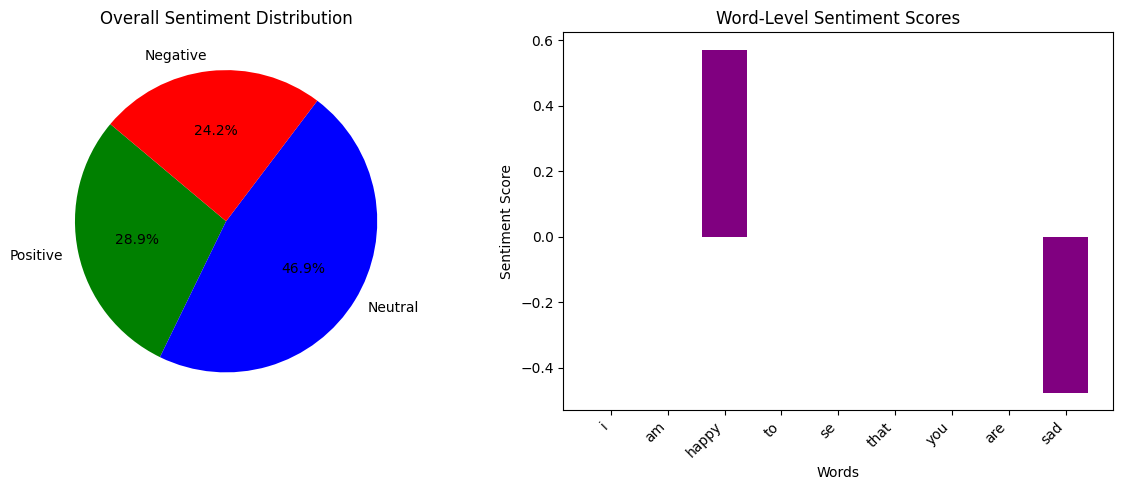

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt

# Download necessary data
nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_comment(comment):
    # Get overall sentiment scores
    sentiment_scores = sia.polarity_scores(comment)

    # Word-level sentiment analysis
    words = comment.split()
    word_scores = {word: sia.polarity_scores(word)['compound'] for word in words}

    # Determine overall sentiment
    if sentiment_scores['compound'] > 0.05:
        overall_sentiment = "Positive"
    elif sentiment_scores['compound'] < -0.05:
        overall_sentiment = "Negative"
    else:
        overall_sentiment = "Neutral"

    return sentiment_scores, word_scores, overall_sentiment

# Visualization function
def visualize_sentiments(sentiment_scores, word_scores):
    # Pie chart for overall sentiment distribution
    labels = ['Positive', 'Neutral', 'Negative']
    sizes = [sentiment_scores['pos'], sentiment_scores['neu'], sentiment_scores['neg']]
    colors = ['green', 'blue', 'red']

    plt.figure(figsize=(12, 5))

    # Pie chart
    plt.subplot(1, 2, 1)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title('Overall Sentiment Distribution')

    # Bar chart for word-level sentiment
    plt.subplot(1, 2, 2)
    words, scores = zip(*word_scores.items())
    plt.bar(words, scores, color='purple')
    plt.xticks(rotation=45, ha='right')
    plt.title('Word-Level Sentiment Scores')
    plt.xlabel('Words')
    plt.ylabel('Sentiment Score')

    plt.tight_layout()
    plt.show()

# Input and analysis
comment = input("Enter your statement: ")
sentiment_scores, word_scores, overall_sentiment = analyze_comment(comment)

# Display results
print("\nOverall Sentiment:", overall_sentiment)
print("\nSentiment Scores:", sentiment_scores)
print("\nWord-Level Sentiment Scores:")
for word, score in word_scores.items():
    print(f"  {word}: {score:.2f}")

# Visualize results
visualize_sentiments(sentiment_scores, word_scores)
